In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('test_data.csv')

In [3]:
print("First few rows of the dataset:")
print(data.head())

def standardize(data):
    """
    Standardizes the features in the data by subtracting the mean and dividing by the standard deviation.
    """
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    return (data - means) / stds

First few rows of the dataset:
   Day  Sleep Hours  Rank of Food Quality  Working Hours  \
0    1            7                     4              8   
1    2            8                     3              9   
2    3            6                     2              7   
3    4            5                     5             10   
4    5            8                     4              8   

   Rank of Health Condition  Rank of Mood  Rank of Productivity  
0                         3             2                     4  
1                         4             1                     5  
2                         2             3                     3  
3                         1             4                     2  
4                         4             2                     4  


In [4]:
def model(X, weights, bias):
    """
    Calculates the predicted values for the given data points using the linear regression model.
    """
    predictions = []
    for i in range(len(X)):
        row_dot_product = 0
        for j in range(len(weights)):
            row_dot_product += X[i][j] * weights[j]
        predictions.append(row_dot_product + bias)
    return np.array(predictions)

In [5]:
def mean_squared_error(y_true, y_predicted):
    """
    Calculates the mean squared error between the true values and predicted values.
    """
    total_error = 0
    for i in range(len(y_true)):
        total_error += (y_true[i] - y_predicted[i])**2
    return total_error / len(y_true)

In [6]:
def gradient_descent(X, y, learning_rate, epochs):
    """
    Implements the gradient descent algorithm to learn the optimal weights and bias for the model.
    """
    # Standardize the features (optional but recommended)
    X = standardize(X)

    # Extract number of features and data points
    num_features = X.shape[1]
    m = np.random.rand(num_features)  # Initialize random weights
    c = random.uniform(1, 10)  # Initialize random bias
    num_epochs = epochs if epochs else random.randint(100, 1000)  # Random number of epochs

    loss_history = []  # Track loss for visualization

    for epoch in range(num_epochs):
        # Calculate predictions
        predictions = model(X, m, c)

        # Calculate loss
        loss = mean_squared_error(y, predictions)
        loss_history.append(loss)

        # Calculate gradients (derivatives of loss w.r.t weights and bias)
        weights_gradient = np.zeros(num_features)
        bias_gradient = 0
        for i in range(len(y)):
            error = y[i] - predictions[i]
            for j in range(num_features):
                weights_gradient[j] += -2 * X[i][j] * error
            bias_gradient += -2 * error
        weights_gradient /= len(y)
        bias_gradient /= len(y)

        # Update weights and bias
        m -= learning_rate * weights_gradient
        c -= learning_rate * bias_gradient

        # Print loss for monitoring (optional)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Loss: {loss:.4f}")

    return m, c, loss_history

In [7]:
X = data.iloc[:, :-1].to_numpy()  # All columns except the last one (Rank of Productivity)
y = data.iloc[:, -1].to_numpy()  # Last column (Rank of Productivity)

learning_rate = 0.01

weights, bias, loss_history = gradient_descent(X.copy(), y.copy(), learning_rate, epochs=None)

print(f"Learned weights: {weights}")
print(f"Learned bias: {bias}")

Epoch: 0, Loss: 3.8561
Epoch: 100, Loss: 0.2545
Epoch: 200, Loss: 0.1949
Epoch: 300, Loss: 0.1872
Epoch: 400, Loss: 0.1842
Epoch: 500, Loss: 0.1830
Epoch: 600, Loss: 0.1824
Epoch: 700, Loss: 0.1821
Epoch: 800, Loss: 0.1820
Epoch: 900, Loss: 0.1819
Learned weights: [-0.14913869  0.54009265  0.52762698 -0.0330309   0.31835603 -0.17082813]
Learned bias: 3.2000000018424695


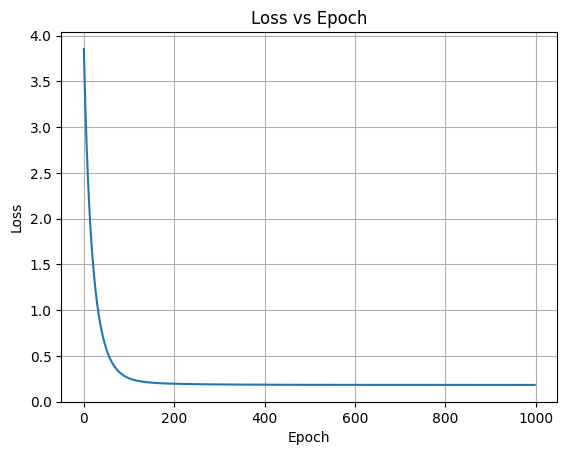

In [14]:
# Plot the loss during gradient descent
plt.plot(range(len(loss_history)), loss_history)
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [18]:
new_data = np.array([7, 5, 9, 2, 4])  # Example data
new_data_standardized = standardize(new_data.reshape(1, -1))  # Standardize the new data
# Check for NaNs or infinite values in the new data
if np.isnan(new_data_standardized).any() or np.isinf(new_data_standardized).any():
    print("New data contains NaNs or infinite values.")

# Standardize the new data using the same mean and standard deviation as the training data
new_data_standardized = (new_data - np.mean(X, axis=0)) / np.std(X, axis=0)

# Check if any of the learned weights or bias are NaN or infinite
if np.isnan(weights).any() or np.isinf(weights).any() or np.isnan(bias) or np.isinf(bias):
    print("Learned weights or bias contain NaNs or infinite values.")
    
# Identify NaNs or infinite values in the new data
nan_indices = np.isnan(new_data_standardized).any(axis=1)
inf_indices = np.isinf(new_data_standardized).any(axis=1)


# Print indices of rows containing NaNs or infinite values
if np.any(nan_indices) or np.any(inf_indices):
    print("Indices of rows containing NaNs:")
    print(np.where(nan_indices)[0])
    print("Indices of rows containing infinite values:")
    print(np.where(inf_indices)[0])

# Remove rows with NaNs or infinite values from the new data
cleaned_new_data_standardized = new_data_standardized[~(nan_indices | inf_indices)]

# Adjust the shape of X to match the shape of new_data
X_adjusted = X[:, :5]

new_data_standardized = (new_data - np.mean(X_adjusted, axis=0)) / np.std(X_adjusted, axis=0)

# Make predictions only on cleaned data
predicted_productivity = model(cleaned_new_data_standardized, weights, bias)
print(f"Predicted Rank of Productivity: {predicted_productivity[0]:.2f}")


print("Shape of new_data_standardized:", new_data_standardized.shape)
print("Shape of weights:", weights.shape)
# Remove one weight to match the number of features in the input data
weights = weights[:-1]
# Make predictions on new data
predicted_productivity = model(new_data_standardized, weights, bias)
print(f"Predicted Rank of Productivity: {predicted_productivity[0]:.2f}")


New data contains NaNs or infinite values.


C:\Users\ibzcl\AppData\Local\Temp\ipykernel_164\3774632637.py:10: RuntimeWarning: invalid value encountered in divide
  return (data - means) / stds


ValueError: operands could not be broadcast together with shapes (5,) (6,) 